In [2]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

## Countries List

In [ ]:
# Countries we will analyze
# We are 'randomly' picking two countries from each continent excluding Antartica. 
countries_list = ["United States","Mexico","Venezuela","Brazil","South Africa","Nigeria","Poland","Sweden","China","South Korea","Russia", "Australia" ]


## World Happiness Report

In [125]:
#2015 World Happiness Report
csvpath = os.path.join("Data/World_happiness_report/2015.csv")
happy_2015_df = pd.read_csv(csvpath)
happy_2015_df
countries15 = happy_2015_df[happy_2015_df.Country.isin(countries_list)]
countries15 = countries15.loc[:,["Country","Happiness Score"]]
countries15 = countries15.rename(columns={"Happiness Score": "2015 Happiness Score"})

#2016 World Happines Report
csvpath = os.path.join("Data/World_happiness_report/2016.csv")
happy_2016_df = pd.read_csv(csvpath)
happy_2016_df
countries16 = happy_2016_df[happy_2016_df.Country.isin(countries_list)]
countries16 = countries16.loc[:,["Country","Happiness Score"]]
countries16 = countries16.rename(columns={"Happiness Score": "2016 Happiness Score"})

#2017 World Happines Report
csvpath = os.path.join("Data/World_happiness_report/2017.csv")
happy_2017_df = pd.read_csv(csvpath)
countries17 = happy_2017_df[happy_2017_df.Country.isin(countries_list)]
countries17 = countries17.loc[:,["Country","Happiness.Score"]]
countries17 = countries17.rename(columns={"Happiness.Score": "2017 Happiness Score"})
countries17

#2018 World Happines Report
csvpath = os.path.join("Data/World_happiness_report/2018.csv")
happy_2018_df = pd.read_csv(csvpath)
countries18 = happy_2018_df[happy_2018_df["Country or region"].isin(countries_list)]
countries18 = countries18.loc[:,["Country or region","Score"]]
countries18 = countries18.rename(columns={"Score": "2018 Happiness Score","Country or region":"Country"})
countries18

#2019 World Happines Report
csvpath = os.path.join("Data/World_happiness_report/2019.csv")
happy_2019_df = pd.read_csv(csvpath)
happy_2019_df
countries19 = happy_2019_df[happy_2019_df["Country or region"].isin(countries_list)]
countries19 = countries19.loc[:,["Country or region","Score"]]
countries19 = countries19.rename(columns={"Score": "2019 Happiness Score","Country or region":"Country"})
countries19

#Merging years
happy_2015_2016 = pd.merge(countries15,countries16,on='Country')
happy_2015_2016_2017 = pd.merge(happy_2015_2016,countries17,on="Country")
happy_2015_2016_2017_18 = pd.merge(happy_2015_2016_2017,countries18)
total_happy = pd.merge(happy_2015_2016_2017_18,countries19)
total_happy["Average Happiness"] = (total_happy["2015 Happiness Score"] + total_happy["2016 Happiness Score"] + total_happy["2017 Happiness Score"] + total_happy["2018 Happiness Score"] + total_happy["2019 Happiness Score"]) / 5
total_happy

,Country,2015 Happiness Score,2016 Happiness Score,2017 Happiness Score,2018 Happiness Score,2019 Happiness Score,Average Happiness
0,Sweden,7.364,7.291,7.284,7.314,7.343,7.3192
1,Australia,7.284,7.313,7.284,7.272,7.228,7.2762
2,Mexico,7.187,6.778,6.578,6.488,6.595,6.7252
3,United States,7.119,7.104,6.993,6.886,6.892,6.9988
4,Brazil,6.983,6.952,6.635,6.419,6.300,6.6578
5,Venezuela,6.810,6.084,5.250,4.806,4.707,5.5314
6,South Korea,5.984,5.835,5.838,5.875,5.895,5.8854
7,Poland,5.791,5.835,5.973,6.123,6.182,5.9808
8,Russia,5.716,5.856,5.963,5.810,5.648,5.7986
9,Nigeria,5.268,4.875,5.074,5.155,5.265,5.1274


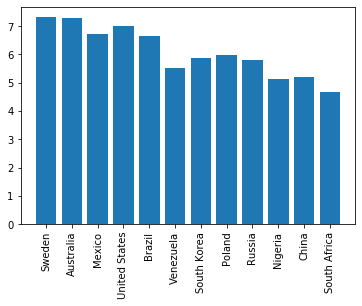

In [128]:
plt.bar(total_happy.Country,total_happy["Average Happiness"])
plt.xticks(rotation=90)
plt.show()

## Productivity/Working Hours Data

In [161]:
# Reading Productivity dataframe
filepath = os.path.join("Output","productivity.csv")
productivity_df = pd.read_csv(filepath)

# These seem like irrelevant columns. I am deleting them. 
del productivity_df["Unnamed: 0"]
del productivity_df["Unnamed: 5"]

# Refining our analysis to the countries listed above. 
productivity_df = productivity_df[productivity_df.Entity.isin(countries_list)]

# # Removing 0 values. There exists 254 0 values in productivity and Work Hours per persons engaged columns. 
productivity_df = productivity_df.loc[(productivity_df[["Work hours per persons engaged","Productivity"]]!=0.00).any(axis=1)]
productivity_df

,Entity,Code,Year,Work hours per persons engaged,Productivity
0,Australia,AUS,1950.0,2178.2456,13.322768
1,Australia,AUS,1951.0,2158.1013,12.820562
2,Australia,AUS,1952.0,2138.1436,12.497678
3,Australia,AUS,1953.0,2118.3701,14.030227
4,Australia,AUS,1954.0,2098.7798,14.992547
...,...,...,...,...,...
822,Venezuela,VEN,2002.0,1829.0203,9.460864
823,Venezuela,VEN,2003.0,1801.2109,9.292365
824,Venezuela,VEN,2004.0,1896.6949,10.846614
825,Venezuela,VEN,2005.0,1922.8501,13.346090


## Mental Health

In [162]:
#Creating Mental Health DF
filepath = os.path.join("Data","Mental_health","share_with_mental_and_substance_disorders.csv")
mental_health_df = pd.read_csv(filepath)

# Refining our analysis to the countries listed above.
mental_health_df = mental_health_df[mental_health_df.Entity.isin(countries_list)]

# Saving clean mental health DF to a csv file
mental_health_df.to_csv("Data/Mental_health/clean_mental_health.csv")

#Displaying DF
mental_health_df


,Entity,Code,Year,Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent) (%)
308,Australia,AUS,1990,18.077892
309,Australia,AUS,1991,18.140260
310,Australia,AUS,1992,18.195549
311,Australia,AUS,1993,18.246135
312,Australia,AUS,1994,18.279663
...,...,...,...,...
6239,Venezuela,VEN,2013,11.105906
6240,Venezuela,VEN,2014,11.108576
6241,Venezuela,VEN,2015,11.112369
6242,Venezuela,VEN,2016,11.110904


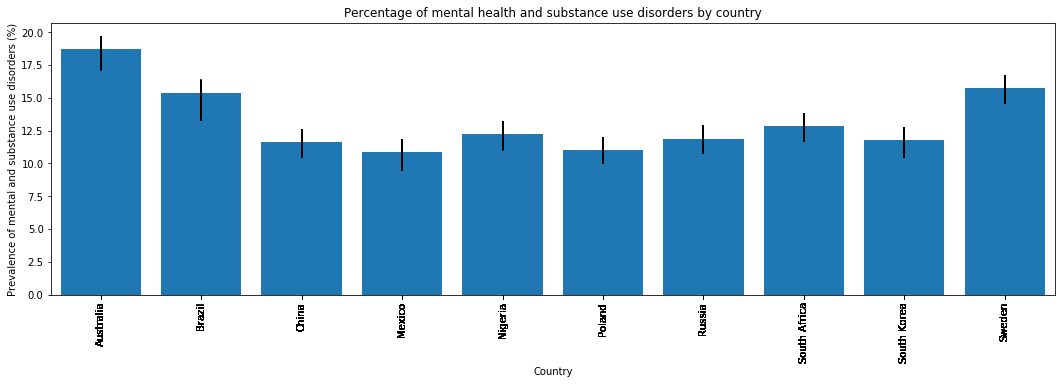

In [163]:
# Assigning our chart axes
x_values = mental_health_df.Entity
y_values = mental_health_df["Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent) (%)"]


# Displaying bar chart of % of mental health and substance use disorders by country
xlocation = [value for value in x_values]
f, ax = plt.subplots(figsize=(18,5))
# adding a y-error interval of +/- 1 to empahsis 
plt.bar(x_values,y_values,yerr=1)
plt.xticks(xlocation,x_values,rotation=90)
plt.xlabel("Country")
plt.ylabel("Prevalence of mental and substance use disorders (%)")
plt.title("Percentage of mental health and substance use disorders by country")
plt.xlim(-.5,9.5)
plt.show()



## Chi-square test on mental health df

In [164]:
# Not sure if I am using the chi-square test correctly. I am using it to test goodness of fit on the size of 
# the country samples. 

df = pd.DataFrame(mental_health_df.Entity.value_counts())
df["Expected"] = 28
df = df.rename(columns={"Entity":"Observed"})

critical_value = stats.chi2.ppf(q=.95,df=9)
critical_value

stats.chisquare(df.Observed,df.Expected)

Power_divergenceResult(statistic=0.0, pvalue=1.0)

## World Bank Health Systems

In [165]:
# Viewing World Bank Health Systems 
filepath = os.path.join("Data","Health_systems","World_Bank_health_systems.csv")
data_df = pd.read_csv(filepath)
data_df

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,US,Virgin Islands,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN
207,NaN,NaN,"Yemen, Rep.",5.6,10.2,81.0,72.0,144.5,7.8,0.3,0.7,0.8,30.7,NaN
208,Zambia,NaN,Zambia,4.5,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,NaN


## Cantril Happiness

In [139]:
#Obtaining and visualizing Cantril Happiness score average per chosen country
filepath = os.path.join("Data","Life_satisfcation_and_happiness","happiness_cantril_ladder.csv")
Cantril_hap = pd.read_csv(filepath)

#Renaming columns
Cantril_hap  = Cantril_hap.rename(columns={"World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))":"Cantril Ladder(0=worst,10=best)"})

# Refining our analysis to the countries listed above. 
Cantril_hap = Cantril_hap[Cantril_hap.Entity.isin(countries_list)]
Cantril_hap


,Entity,Code,Year,"Cantril Ladder(0=worst,10=best)"
59,Australia,AUS,2005,7.340688
60,Australia,AUS,2007,7.285391
61,Australia,AUS,2008,7.253757
62,Australia,AUS,2010,7.450047
63,Australia,AUS,2011,7.405616
...,...,...,...,...
1650,Venezuela,VEN,2014,6.136096
1651,Venezuela,VEN,2015,5.568800
1652,Venezuela,VEN,2016,4.041115
1653,Venezuela,VEN,2017,5.070751


In [142]:
# Grouping by country and finding the average Cantril Ladder Score
Cantril_hap_group = Cantril_hap.groupby("Entity").mean().reset_index()
del Cantril_hap_group["Year"]
Cantril_hap_group

,Entity,"Cantril Ladder(0=worst,10=best)"
0,Australia,7.298081
1,Brazil,6.673208
2,China,4.984993
3,Mexico,6.774823
4,Nigeria,5.028795
5,Poland,5.865575
6,Russia,5.528827
7,South Africa,4.854910
8,South Korea,5.879054
9,Sweden,7.371575


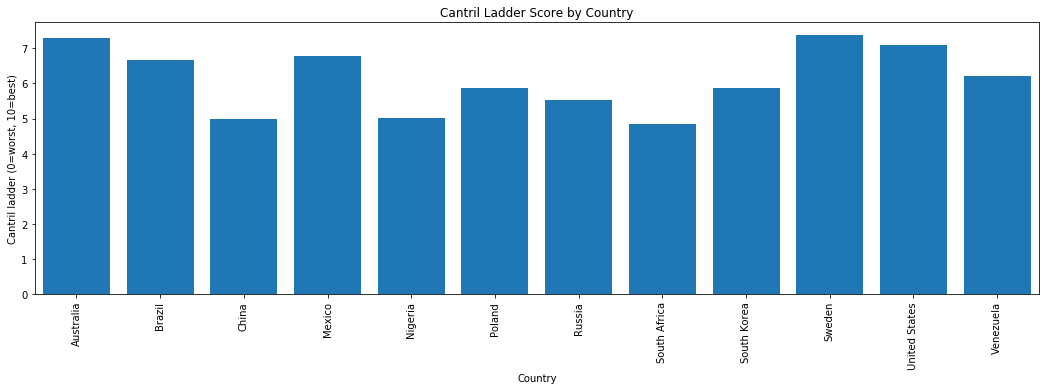

In [166]:
#Graphically displaying Average Cantril Happiness Score by country
xlocation = [value for value in Cantril_hap_group["Entity"]]
f, ax = plt.subplots(figsize=(18,5))
plt.bar(Cantril_hap_group["Entity"],Cantril_hap_group["Cantril Ladder(0=worst,10=best)"])
plt.xticks(xlocation,Cantril_hap_group["Entity"],rotation=90)
plt.xlabel("Country")
plt.ylabel("Cantril ladder (0=worst, 10=best)")
plt.title("Cantril Ladder Score by Country")
plt.xlim(-.5,len(Cantril_hap_group.Entity)-.5)
plt.show()

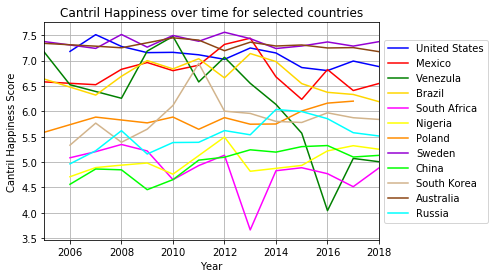

In [133]:
# Obtaining and visualizing Cantril Happiness score over time per chosen country
Cantril_hap

countries_list = [name for name in Cantril_hap.Entity.unique()]
years = [value for value in Cantril_hap.Year.unique()]
years
# Country data
US_data = Cantril_hap.loc[Cantril_hap.Entity == "United States"]
Mexico_data = Cantril_hap.loc[Cantril_hap.Entity == "Mexico"]
Venezuela_data = Cantril_hap.loc[Cantril_hap.Entity == "Venezuela"]
Brazil_data = Cantril_hap.loc[Cantril_hap.Entity == "Brazil"]
South_Africa_data = Cantril_hap.loc[Cantril_hap.Entity == "South Africa"]
Nigeria_data = Cantril_hap.loc[Cantril_hap.Entity == "Nigeria"]
Poland_data = Cantril_hap.loc[Cantril_hap.Entity == "Poland"]
Sweden_data = Cantril_hap.loc[Cantril_hap.Entity == "Sweden"]
China_data = Cantril_hap.loc[Cantril_hap.Entity == "China"]
South_Korea_data = Cantril_hap.loc[Cantril_hap.Entity == "South Korea"]
Australia_data = Cantril_hap.loc[Cantril_hap.Entity == "Australia"]
Russia_data = Cantril_hap.loc[Cantril_hap.Entity == "Russia"]

# Country lines
US_line, = plt.plot(US_data.Year, US_data["Cantril Ladder(0=worst,10=best)"], color="blue", label="United States")
Mexico_line, = plt.plot(Mexico_data.Year, Mexico_data["Cantril Ladder(0=worst,10=best)"], color="red", label="Mexico")
Venezuela_line, = plt.plot(Venezuela_data.Year, Venezuela_data["Cantril Ladder(0=worst,10=best)"], color="green", label="Venezula") 
Brazil_line, = plt.plot(Brazil_data.Year, Brazil_data["Cantril Ladder(0=worst,10=best)"], color="gold", label="Brazil") 
South_Africa_line, = plt.plot(South_Africa_data.Year, South_Africa_data["Cantril Ladder(0=worst,10=best)"], color="fuchsia", label="South Africa") 
Nigeria_line, = plt.plot(Nigeria_data.Year, Nigeria_data["Cantril Ladder(0=worst,10=best)"], color="yellow", label="Nigeria") 
Poland_line, = plt.plot(Poland_data.Year, Poland_data["Cantril Ladder(0=worst,10=best)"], color="darkorange", label="Poland") 
Sweden_line, = plt.plot(Sweden_data.Year, Sweden_data["Cantril Ladder(0=worst,10=best)"], color="darkviolet", label="Sweden") 
China_line, = plt.plot(China_data.Year, China_data["Cantril Ladder(0=worst,10=best)"], color="lime", label="China") 
South_Korea_line, = plt.plot(South_Korea_data.Year, South_Korea_data["Cantril Ladder(0=worst,10=best)"], color="tan", label="South Korea") 
Australia_line, = plt.plot(Australia_data.Year, Australia_data["Cantril Ladder(0=worst,10=best)"], color="saddlebrown", label="Australia") 
Russia_line, = plt.plot(Russia_data.Year, Russia_data["Cantril Ladder(0=worst,10=best)"], color="cyan", label="Russia") 



#Displaying Cantril happiness over time for the selected 10 countries mentioned above. 
plt.legend(handles=[US_line,Mexico_line,Venezuela_line,Brazil_line,South_Africa_line,Nigeria_line,Poland_line,Sweden_line,China_line,South_Korea_line,Australia_line,Russia_line], loc="center left", bbox_to_anchor=(1,.5))
plt.xlim(min(years),max(years))
plt.title("Cantril Happiness over time for selected countries")
plt.xlabel("Year")
plt.ylabel("Cantril Happiness Score")
plt.grid()
plt.show()


## Linear regression function

In [189]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearregression(x_values,y_values,x_label,y_label,x_annotate,y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,3)}x + {round(intercept,3)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(min(x_values)-2,max(x_values)+2)
    plt.ylim(min(y_values)-2,max(y_values)+2)
    plt.title(f'{x_label} vs. {y_label}')
    print(f"The r-squared is: {round(rvalue**2,2)}")
    print(line_eq)
    plt.show()

## Linear Regression of Cantril Happiness and Productivity/Working Hours 

In [190]:
merged_df = pd.merge(Cantril_hap,productivity_df)
merged_df

,Entity,Code,Year,"Cantril Ladder(0=worst,10=best)",Work hours per persons engaged,Productivity
0,Australia,AUS,2005,7.340688,1803.0101,45.976162
1,Australia,AUS,2007,7.285391,1792.6515,45.908466
2,Australia,AUS,2008,7.253757,1790.5400,47.303570
3,Australia,AUS,2010,7.450047,1769.3094,50.503040
4,Australia,AUS,2011,7.405616,1768.6494,52.322773
...,...,...,...,...,...,...
121,United States,USA,2015,6.863947,1765.1826,64.563950
122,United States,USA,2016,6.803600,1760.7960,64.715569
123,United States,USA,2017,6.991759,1757.2255,65.512207
124,Venezuela,VEN,2005,7.169621,1922.8501,13.346090


The r-squared is: 0.41
y = -0.003x + 11.617


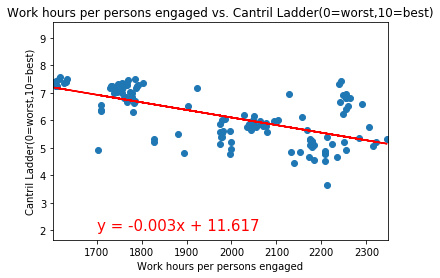

In [191]:
#Assigning axis data and labels
x_data = merged_df["Work hours per persons engaged"]
y_data = merged_df["Cantril Ladder(0=worst,10=best)"]
x_label = "Work hours per persons engaged"
y_label = "Cantril Ladder(0=worst,10=best)"

#Using the linear regression function defined above
linearregression(x_data,y_data,x_label,y_label,1700,2)

##  Linear Regression of Mental Health and Productivity/Working Hours

In [192]:
mental_product_merged_df = pd.merge(mental_health_df,productivity_df)
mental_product_merged_df

,Entity,Code,Year,Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent) (%),Work hours per persons engaged,Productivity
0,Australia,AUS,1990,18.077892,1867.9515,31.074718
1,Australia,AUS,1991,18.140260,1853.8984,31.922300
2,Australia,AUS,1992,18.195549,1851.8408,33.419811
3,Australia,AUS,1993,18.246135,1869.6207,34.155190
4,Australia,AUS,1994,18.279663,1877.7278,34.381001
...,...,...,...,...,...,...
284,Venezuela,VEN,2002,11.032860,1829.0203,9.460864
285,Venezuela,VEN,2003,11.024864,1801.2109,9.292365
286,Venezuela,VEN,2004,11.025445,1896.6949,10.846614
287,Venezuela,VEN,2005,11.025877,1922.8501,13.346090


The r-squared is: 0.46
y = -0.007x + 28.062


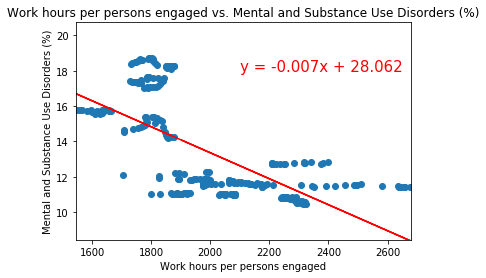

In [193]:
#Assigning axis data and labels
x_data = mental_product_merged_df["Work hours per persons engaged"]
y_data = mental_product_merged_df["Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent) (%)"]
x_label = "Work hours per persons engaged"
y_label = "Mental and Substance Use Disorders (%)"

#Using the linear regression function defined above
linearregression(x_data,y_data,x_label,y_label,2100,18)